<a href="https://colab.research.google.com/github/ximeenaa/REposotoriio/blob/main/Proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Primero importamos las bilbiotecas que usaremos
from google.colab import drive
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Luego, damos acceso a google drive para nuestro archivo de datos
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


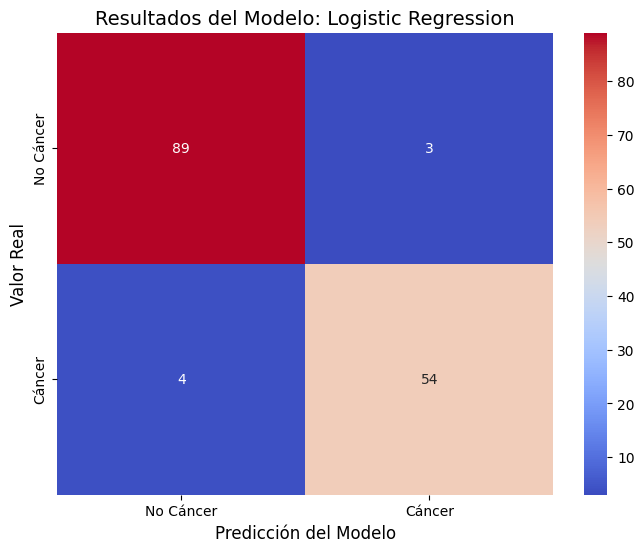


Modelo: Logistic Regression
Precisión: 0.9533


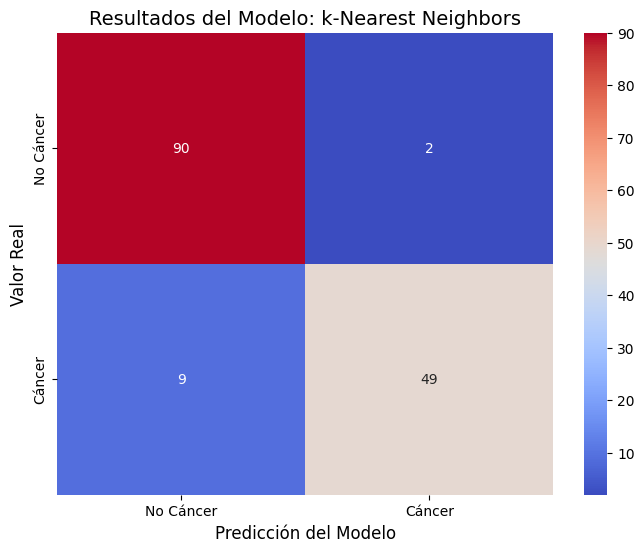


Modelo: k-Nearest Neighbors
Precisión: 0.9267


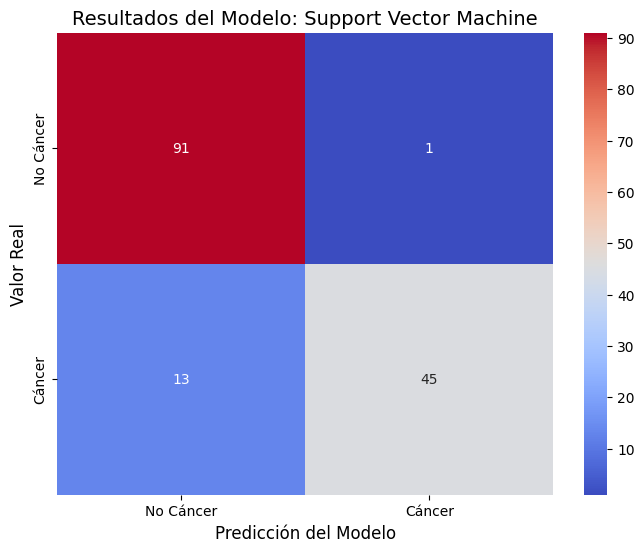


Modelo: Support Vector Machine
Precisión: 0.9067


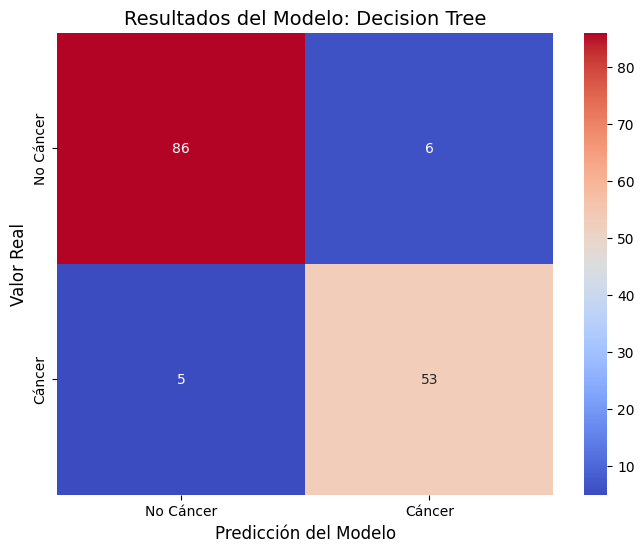


Modelo: Decision Tree
Precisión: 0.9267


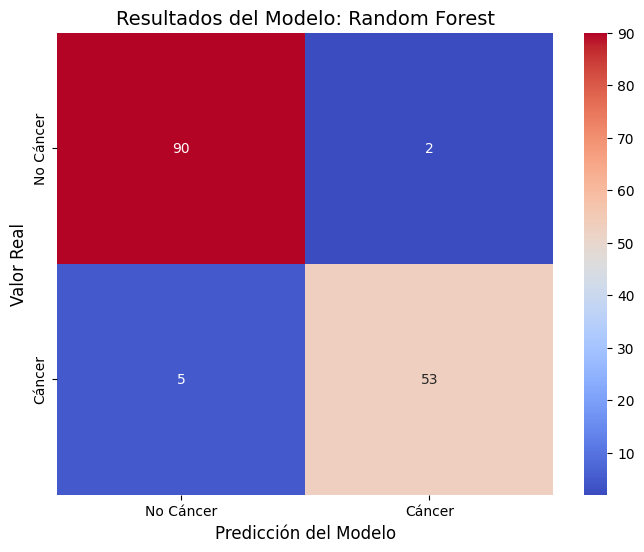


Modelo: Random Forest
Precisión: 0.9533


In [ ]:
#Bloque principal del main
if __name__ == "__main__":
    """
    Punto de entrada del programa. Ejecuta el flujo principal.
    """
    #Colocamos la ruta del archivo desde Google Drive
    ruta_archivo = "/content/drive/MyDrive/cancer (2).csv"

    # Flujo principal
    X, y = cargar_datos(ruta_archivo)
    if X is not None and y is not None:
        X_train, X_test, y_train, y_test = dividir_datos(X, y)
        modelos = inicializar_modelos()
        resultados = entrenar_evaluar_modelos(modelos, X_train, X_test, y_train, y_test)
        for nombre, metricas in resultados.items():
            graficar_matriz_confusion(metricas['Confusion Matrix'], titulo=nombre)
            print(f"\nModelo: {nombre}")
            print(f"Precisión: {metricas['Accuracy']:.4f}")

def cargar_datos(ruta_archivo):#Definimos funciones
    """
    Carga y preprocesa los datos.
    """
    try:
        #Cargamos los datos
        data = pd.read_csv(ruta_archivo)

        #Eliminamos columna irrelevante
        if 'id' in data.columns:
            data = data.drop(columns=['id'])

        #Codificamos etiquetas (M=1, B=0)
        data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

        #Separamos características y etiquetas
        X = data.drop(columns=['diagnosis'])
        y = data['diagnosis']

        return X, y
    except Exception as e:
        print(f"Error al cargar los datos: {e}")
        return None, None

def dividir_datos(X, y):
    """
    Divide los datos en conjuntos de entrenamiento y prueba.
    """
    return train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

def inicializar_modelos():
    """
    Inicializa y devuelve clasificadores.
    """
    return {
        'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
        'k-Nearest Neighbors': KNeighborsClassifier(),
        'Support Vector Machine': SVC(probability=True, random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'Random Forest': RandomForestClassifier(random_state=42)
    }

def entrenar_evaluar_modelos(modelos, X_train, X_test, y_train, y_test):
    """
    Entrena y evalúa los modelos.
    """
    resultados = {}
    for nombre, modelo in modelos.items():
        try:
            modelo.fit(X_train, y_train)
            y_pred = modelo.predict(X_test)
            resultados[nombre] = {
                'Accuracy': accuracy_score(y_test, y_pred),
                'F1 Score': f1_score(y_test, y_pred),
                'Confusion Matrix': confusion_matrix(y_test, y_pred)
            }
        except Exception as e:
            print(f"Error al entrenar o evaluar {nombre}: {e}")
    return resultados

def graficar_matriz_confusion(matriz, titulo):
    """
    Genera una gráfica personalizada de la matriz de confusión.

    Argumentos:
        matriz: Matriz de confusión.
        titulo: Título del gráfico.
    """
    plt.figure(figsize=(8, 6))  # Ajuste de tamaño
    sns.heatmap(
        matriz,
        annot=True,
        fmt='d',
        cmap='coolwarm',  # Cambiamos la paleta de colores
        xticklabels=['No Cáncer', 'Cáncer'],  # Etiquetamos al eje X
        yticklabels=['No Cáncer', 'Cáncer']   # Etiquetamos al eje Y
    )
    plt.title(f'Resultados del Modelo: {titulo}', fontsize=14)  # Título personalizado
    plt.xlabel('Predicción del Modelo', fontsize=12)  # Etiqueta del eje X
    plt.ylabel('Valor Real', fontsize=12)  # Etiqueta del eje Y
    plt.xticks(fontsize=10)  # Tamaño de la fuente de las etiquetas del eje X
    plt.yticks(fontsize=10)  # Tamaño de la fuente de las etiquetas del eje Y
    plt.show()
